In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.1 MB 4.9 MB/s 
     |████████████████████████████████| 17.9 MB 1.3 MB/s 
     |████████████████████████████████| 236 kB 61.8 MB/s 
     |████████████████████████████████| 207 kB 65.6 MB/s 
     |████████████████████████████████| 2.1 MB 58.2 MB/s 
     |████████████████████████████████| 634 kB 46.2 MB/s 
     |████████████████████████████████| 1.4 MB 49.3 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 49 kB 6.5 MB/s 
     |████████████████████████████████| 943 kB 39.8 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 3.5 MB 47.0 MB/s 
     |████████████████████████████████| 6.3 MB 47.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.31.0-py3-none-any.whl size=11728 sha256=0eefe48fe0cf5eb5ac562c680c80ab845598fdc1e027c86cd922201d85f074dc
  Stored in directory: /root/.cache/pip/wheels/29/dd/b2/1fe1a9ac92aaf75b267d893ae27329ea229f292a29301

In [ ]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [ ]:
#Importación de librerías

#!pip install qiskit ipywidgets    correr esta línea de primero si se trabaja en google collab
#Importación de qiskit
from qiskit import *

# %matplotlib inline
from matplotlib import *


#Se importa quantum_info para poder trabajar con herramientas útiles como las matríces de pauli y elementos para trabajar
# con operadores.
import qiskit.quantum_info as qi
from qiskit.quantum_info import *

#Simplemente para que no se vean los warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Librerías matemáticas importantes
import numpy as np
import matplotlib.pyplot as plt

qi.Pauli('XXI').to_matrix()


array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
def H(qubits,g):
    """  Energia para el Hamiltoniano del modelo de Ising para una función de onda:
    
         Esta función calcula la energía o valor promedio del Hamiltoniano perteneciente al 
         modelo de Ising para una función de estado otorgada y una constante g también 
         arbitraria. 
    
    Entrada(s): 
        statevec: vector de estado correspondiente a n-qubits que se están tratando. 
        g= constante real entera g como parte del Hamiltoniano
    
    """
    H=0
    
    #Se itera por cada qubit hasta n-1 (sumatoria en sigmaz sigmaz+1)
    for i in range(0,qubits-1):
        
        parop=['','','']                   
        
        #Iteración sobre cada i-ésimo agregando la Identidad en el producto tensorial para la sumatoria de sigmaz,sigmax
        for j in range(0,i):
            parop[0]= parop[0] + 'I'
            parop[1]= parop[1] + 'I'

        #Se agrega ZZ como X en cada iteración
        parop[0] = parop[0] + 'ZZ'
        parop[1] = parop[1] + 'X'

        
        #Se agrega el tensor con la identidad para completar la dimensión del esatdo
        for w in range(i+2,qubits):
            parop[0] = parop[0]+'I'
        for q in range(i+1,qubits):
            parop[1] = parop[1]+'I'
            
            
        #Se encuentra el valor de energía para la i-ésima iteración, se suma al valor anterior
        H= H + qi.Pauli(parop[0]).to_matrix() + g*qi.Pauli(parop[1]).to_matrix() 
        
        #Ya que la sumatoria recorre la de sigmaz, falta agregar un último término de sigmax,aquí se agrega
        if i==qubits-2:
            for k in range(0,i+1):
                parop[2]= parop[2] + 'I'
            parop[2]= parop[2]+ 'X'
            H = H + g*qi.Pauli(parop[2]).to_matrix() #Se suma a la función de costo
        
          #Debugging
#         print(parop[0],parop[1],parop[2])  
#         print(energia)
        
    return H


In [ ]:
eigenvalues = list()
glist = [-2,-1.6,-1.2,-1.0,-0.6,-0.4,-0.2,0,0.4,0.6,1.0,1.2,1.6,2]
for i in range(len(glist)):
  Emin = np.amin(np.linalg.eig(H(6,glist[i]).real)[0])
  eigenvalues.append(Emin)
  
print(eigenvalues)

for i in eigenvalues: #Imprime cada elemento de la lista
 print(i)

 

[-12.630964276492946, -10.392968117861601, -8.269344348226944, -7.296229810558747, -5.770919159434487, -5.32762382200003, -5.08031448852591, -5.0, -5.32762382200003, -5.770919159434487, -7.296229810558747, -8.269344348226944, -10.392968117861601, -12.630964276492946]
-12.630964276492946
-10.392968117861601
-8.269344348226944
-7.296229810558747
-5.770919159434487
-5.32762382200003
-5.08031448852591
-5.0
-5.32762382200003
-5.770919159434487
-7.296229810558747
-8.269344348226944
-10.392968117861601
-12.630964276492946


In [ ]:
qubits_2 = np.array([[-4.1231056,	-3.35261087747,	-2.5999999,	-2.23606795265,	-1.56204991398,	-1.280624843093,	-1.0770329231545,	-0.9999999,	-1.2806248429229,	-1.56049903387962,	-2.23606797118279,	-2.59999999575114,	-3.35261091072162,	-4.12310561670599
],[-4.123105625617659, -3.3526109228480427, -2.6, -2.2360679774997885, -1.5620499351813293, -1.2806248474865687, -1.077032961426902, -1.0, -1.2806248474865687, -1.5620499351813293, -2.2360679774997885, -2.6, -3.3526109228480427, -4.123105625617659]])
qubits_3 = np.array([[-6.24977083354723,	-5.1181585851312,	-4.00618810064307,	-3.49375053004018,	-2.58252404894854,	-2.24639906767049,	-2.05742660921868,	-1.99999817771868,	-2.25274558102426,	-2.54129088699448,	-3.49389185153239,	-4.0140391738137,	-5.10818677782595,	-6.24975576906417
],[-6.249770839529146, -5.111825484518979, -4.0140392844322115, -3.493959207434933, -2.5829140037687104, -2.2530643775397503, -2.057777869224423, -2.0, -2.2530643775397503, -2.5829140037687104, -3.493959207434933, -4.0140392844322115, -5.111825484518979, -6.249770839529146]])
qubits_4 = np.array([[-8.36859387646332,	-6.83816787686939,	-5.42408509672324,	-4.66327915685715,	-3.57642788890517,	-3.23511443921045,	-3.05848672073684,	-2.99292402945117,	-3.24075918522237,	-3.55009534942308,	-4.7191289242745,	-5.41419957437365,	-6.8598416314202,	-8.36675387443134
],[-8.376798636850356, -6.872046449473257, -5.431519582737492, -4.758770483143644, -3.631385808848746, -3.264149834264783, -3.061734803953753, -3.0, -3.264149834264783, -3.631385808848746, -4.758770483143644, -5.431519582737492, -6.872046449473257, -8.376798636850356]])
qubits_5 = np.array([[-10.432080493192,	-8.36260131803059,	-6.80570699729439,	-5.86586936077916,	-4.63663700633042,	-4.18676545721558,	-4.03868461657294,	-3.98246049743288,	-4.23374205304252,	-4.63145655400768,	-5.96907836676856,	-6.66483477399863,	-8.57851137837828,	-10.3832442604675
],[-10.503877297734364, -8.632480719393469, -6.850187770158743, -6.026674183332277, -4.696054456230227, -4.292256538946746, -4.070534833268546, -4.0, -4.292256538946746, -4.696054456230227, -6.026674183332277, -6.850187770158743, -8.632480719393469, -10.503877297734364]])
qubits_6 = np.array([[-12.2752269956275,	-10.2548155273843,	-7.59715036349484,	-7.07639004832315,	-5.58301470860246,	-5.20268595813412,	-4.97768797741058,	-4.8662402172908,	-5.17528997118227,	-5.27995111056409,	-6.59354086579503,	-7.83898053901556,	-9.69558598637691,	-12.123268786648
],[-12.630964276492946, -10.392968117861601, -8.269344348226944, -7.296229810558747, -5.770919159434487, -5.32762382200003, -5.08031448852591, -5.0, -5.32762382200003, -5.770919159434487, -7.296229810558747, -8.269344348226944, -10.392968117861601, -12.630964276492946]])

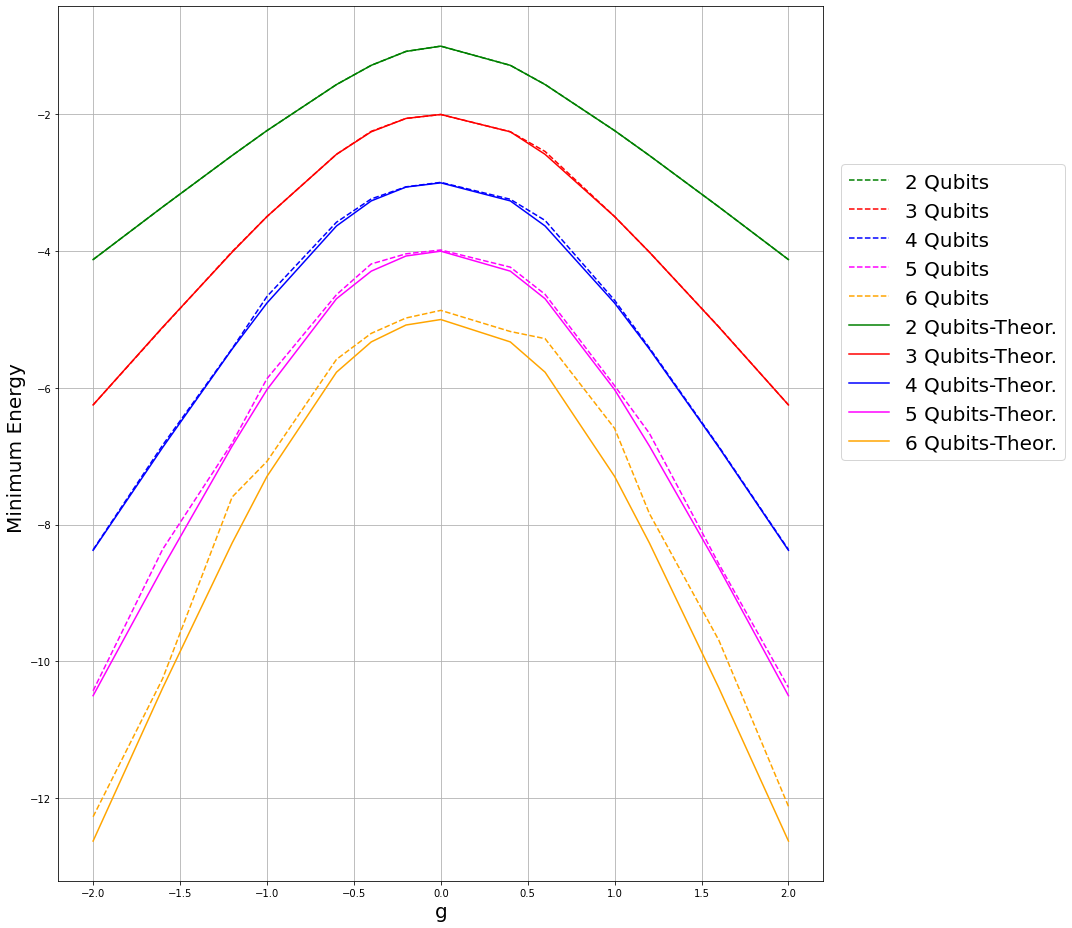

In [ ]:
fig=plt.figure(figsize=(15, 13))
plt.plot(np.array(glist),qubits_2[0], "--", color = "green", label="2 Qubits")
plt.plot(np.array(glist),qubits_3[0], "--", color = "red", label="3 Qubits")
plt.plot(np.array(glist),qubits_4[0], "--", color = "blue", label="4 Qubits")
plt.plot(np.array(glist),qubits_5[0], "--", color = "magenta", label="5 Qubits")
plt.plot(np.array(glist),qubits_6[0], "--", color = "orange", label="6 Qubits")
plt.plot(np.array(glist),qubits_2[1], color = "green", label="2 Qubits-Theor.")
plt.plot(np.array(glist),qubits_3[1], color = "red", label="3 Qubits-Theor.")
plt.plot(np.array(glist),qubits_4[1], color = "blue", label="4 Qubits-Theor.")
plt.plot(np.array(glist),qubits_5[1], color = "magenta", label="5 Qubits-Theor.")
plt.plot(np.array(glist),qubits_6[1], color = "orange", label="6 Qubits-Theor.")
plt.xlabel("g",size=20)
plt.ylabel("Minimum Energy ",size=20)
lgd = plt.legend(bbox_to_anchor=(1.01,0.65), loc="center left",fontsize=20)
plt.tight_layout()
plt.savefig("energy.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.grid()
plt.show()
    


   